In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [12]:
import pandas as pd

train_data = pd.read_csv('datasets/images/sign_mnist_train.csv')
test_data = pd.read_csv('datasets/images/sign_mnist_test.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [4]:
train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [29]:
from tensorflow import one_hot
train_labels = train_data.iloc[:, 0]
train_images = (train_data.iloc[:, 1:] / 255).to_numpy().reshape((-1, 28, 28, 1))


test_labels = test_data.iloc[:, 0]
test_images = (test_data.iloc[:, 1:] / 255).to_numpy().reshape((-1, 28, 28, 1))

train_labels_onehot = one_hot(train_labels, 25).numpy()
test_labels_onehot = one_hot(test_labels, 25).numpy()

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(train_images)

In [6]:
train_labels_onehot

<tf.Tensor: shape=(27455, 25), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>

#  Keras Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall 
model = Sequential()

# model.add(Dense(784, activation='relu'))
# model.add(Dense(392, activation='relu'))
# model.add(Dense(196, activation='relu'))
# model.add(Dense(25, activation='softmax'))

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(25, activation='softmax'))

model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 25 , activation = 'softmax'))


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(datagen.flow(train_images,train_labels_onehot, batch_size = 128), epochs=20, validation_data = (test_images, test_labels_onehot))

  ...
    to  
  ['...']
Train for 215 steps, validate on 7172 samples
Epoch 1/20
215/215 [==============================] - 13s 62ms/step - loss: 0.2824 - accuracy: 0.9165 - val_loss: 0.0822 - val_accuracy: 0.9697
Epoch 2/20
215/215 [==============================] - 11s 49ms/step - loss: 0.0933 - accuracy: 0.9701 - val_loss: 0.0590 - val_accuracy: 0.9834
Epoch 3/20
215/215 [==============================] - 11s 49ms/step - loss: 0.0585 - accuracy: 0.9818 - val_loss: 0.0305 - val_accuracy: 0.9873
Epoch 4/20
215/215 [==============================] - 10s 48ms/step - loss: 0.0456 - accuracy: 0.9854 - val_loss: 0.0517 - val_accuracy: 0.9852
Epoch 5/20
215/215 [==============================] - 10s 48ms/step - loss: 0.0341 - accuracy: 0.9888 - val_loss: 0.0468 - val_accuracy: 0.9902
Epoch 6/20
215/215 [==============================] - 10s 48ms/step - loss: 0.0292 - accuracy: 0.9907 - val_loss: 0.0546 - val_accuracy: 0.9798
Epoch 7/20
215/215 [==============================] - 10s 49ms/st

In [9]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 38, 38, 100)       460900    
Total params: 460,900
Trainable params: 460,900
Non-trainable params: 0
_________________________________________________________________


In [7]:
import numpy as np

predict_test_labels = np.argmax(model.predict(test_images.to_numpy().reshape((-1, 28, 28, 1))), axis=-1)
print(predict_test_labels)

NameError: name 'model' is not defined

In [9]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
#confusion_matrix(test_labels, predict_test_labels)
print('Precision: {}'.format(precision_score(test_labels, predict_test_labels, average='macro')))
print('Recall: {}'.format(recall_score(test_labels, predict_test_labels, average='macro')))

NameError: name 'test_labels' is not defined

# Prediction

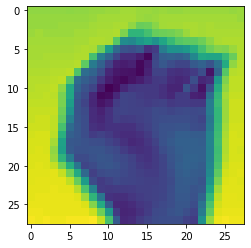

In [51]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('export_detected.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)
img = img / 255
                     
#Show the image with matplotlib
plt.imshow(img)
plt.show()



In [52]:
predicted_index = np.argmax(model.predict(img.reshape((-1, 28, 28, 1))))
print(model.predict(img.reshape((-1, 28, 28, 1))))
chr(ord('A') + predicted_index)


[[8.81606579e-01 2.67072937e-06 5.07626391e-04 6.53372156e-09
  2.94571373e-06 3.58408906e-05 1.49181260e-05 1.70915443e-02
  4.87378404e-09 2.05140436e-11 2.43259524e-09 5.12568306e-07
  5.40249232e-08 3.01635872e-09 4.87148442e-04 1.00234106e-01
  1.55606983e-07 5.08350754e-14 1.94727623e-10 1.37317857e-05
  3.28934427e-12 1.59546276e-09 3.41890484e-07 1.01675104e-08
  1.92311472e-06]]


'A'

# Save

In [31]:
model.save('christina')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: christina\assets


# Load

In [9]:
from tensorflow.keras.models import load_model
model = load_model('christina')

# Save as TensorFlow Lite

In [11]:
# from tensorflow.lite.TFLiteConverter import from_saved_model
# from tensorflow.io.gfile import GFile
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_saved_model('christina')
tflite_model = converter.convert()
with tf.io.gfile.GFile('christina.tflite', 'wb') as f:
  f.write(tflite_model)


In [20]:
print(np.array(train_images).reshape(-1,28, 28).shape)

for i, img in enumerate(np.array(test_images).reshape(-1,28, 28)):
    cv2.imwrite('./test/'+str(i)+'.jpg', img*255)

(27455, 28, 28)
